<a href="https://colab.research.google.com/github/MithilaCoomaraswamy/DSGP/blob/Exercise-Recommender/Desicion_Tree_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# **Data Preprocessing**

In [ ]:
# Load the  exercise dataset
data = pd.read_csv('Exercise dataset.csv')

In [ ]:
# Showing the first 5 rows of the data set
data.head()

,Weight,Height,BMI,Age,BMIcase,Exercise Intensity,Gym Exercise,Home Exercise
0,92.085190,1.760250,29.719488,59,over weight,5,Treadmill Walking with Intervals; Moderate Wei...,Modified Burpees; Step-Ups on a Sturdy Chair o...
1,61.089124,1.595499,23.997776,25,normal,4,Moderate Weight Training (Full Body Workout); ...,Jump Rope; High Knees; Planks; Squats and Lung...
2,82.454037,1.816538,24.987499,50,normal,4,Moderate Weight Training (Full Body Workout); ...,Jump Rope; High Knees; Planks; Squats and Lung...
3,101.713306,1.790696,31.720047,62,obese,6,"Low-Impact Cardio (Elliptical, Cycling); Seate...",Chair Squats; Modified Plank; Seated Leg Lifts...
4,62.347337,1.543259,26.178219,35,over weight,5,Treadmill Walking with Intervals; Moderate Wei...,Modified Burpees; Step-Ups on a Sturdy Chair o...


In [ ]:

# Indentify each numerical data range
data.describe().loc[['min','max']]

,Weight,Height,BMI,Age,Exercise Intensity
min,50.002978,1.390171,15.106978,18.0,1.0
max,109.998871,1.829867,34.997098,65.0,7.0


In [ ]:
# Identifing the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2492 entries, 0 to 2491
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Weight              2492 non-null   float64
 1   Height              2492 non-null   float64
 2   BMI                 2492 non-null   float64
 3   Age                 2492 non-null   int64  
 4   BMIcase             2492 non-null   object 
 5   Exercise Intensity  2492 non-null   int64  
 6   Gym Exercise        2492 non-null   object 
 7   Home Exercise       2492 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 155.9+ KB


In [ ]:
# Value counts in each categorical data

# Making a dictionary for store categorical data
value_counts_dict = {}

# Value count each categorical data by looping and save it in a dictionary

for col in data.columns:
    if data[col].dtype == 'object' or data[col].dtype == 'category':
        value_counts_dict[col] = data[col].value_counts()

# Print each categorical data by looping

for col, value_counts in value_counts_dict.items():
    print(f"Value counts for column '{col}':\n{value_counts}\n")

Value counts for column 'BMIcase':
BMIcase
severe obese         784
over weight          575
normal               550
obese                483
mild thinness         60
moderate thinness     27
sever thinness        13
Name: count, dtype: int64

Value counts for column 'Gym Exercise':
Gym Exercise
Seated Cardio Machines (Rowing, Recumbent Bike); Water-Based Aerobics; Seated Strength Machines (Low Weights); Treadmill Walking at a Slow Pace                                   784
Treadmill Walking with Intervals; Moderate Weightlifting (Upper and Lower Body); Stationary Biking (High Resistance Intervals); Resistance Circuit Training                       575
Moderate Weight Training (Full Body Workout); Elliptical (Moderate Intensity); Stair Climber (Low to Moderate Intensity); Rowing Machine (High Intensity)                         550
Low-Impact Cardio (Elliptical, Cycling); Seated Weight Exercises; Resistance Bands and Cable Exercises; Rowing Machine (Low Resistance)                     

In [ ]:
# Print each unique categorical data

unique_dict = {}

 # Search for unique categorical data by looping and save it in a dictionary

for col in data.columns:
    if data[col].dtype == 'object' or data[col].dtype == 'category':
        unique_dict[col] = data[col].unique()

# Print each unique categorical data by looping

for col, unique in unique_dict.items():
    print(f"'{col}' unique:\n{unique}\n")

'BMIcase' unique:
['over weight' 'normal' 'obese' 'severe obese' 'mild thinness'
 'moderate thinness' 'sever thinness']

'Gym Exercise' unique:
['Treadmill Walking with Intervals; Moderate Weightlifting (Upper and Lower Body); Stationary Biking (High Resistance Intervals); Resistance Circuit Training'
 'Moderate Weight Training (Full Body Workout); Elliptical (Moderate Intensity); Stair Climber (Low to Moderate Intensity); Rowing Machine (High Intensity)'
 'Low-Impact Cardio (Elliptical, Cycling); Seated Weight Exercises; Resistance Bands and Cable Exercises; Rowing Machine (Low Resistance)'
 'Seated Cardio Machines (Rowing, Recumbent Bike); Water-Based Aerobics; Seated Strength Machines (Low Weights); Treadmill Walking at a Slow Pace'
 'Light Weightlifting for Major Muscle Groups; Stationary Biking (Moderate Intensity); Incline Walking on Treadmill; Leg Press and Arm Press (Low to Moderate Weights)'
 'Rowing Machine (Moderate Intensity); Resistance Training with Machines (Light Weight

In [ ]:
# Encode 'BMIcase' into numerical values

label_encoder = LabelEncoder()
data['BMIcase_encoded'] = label_encoder.fit_transform(data['BMIcase'])

In [ ]:
data.head()

,Weight,Height,BMI,Age,BMIcase,Exercise Intensity,Gym Exercise,Home Exercise,BMIcase_encoded
0,92.085190,1.760250,29.719488,59,over weight,5,Treadmill Walking with Intervals; Moderate Wei...,Modified Burpees; Step-Ups on a Sturdy Chair o...,4
1,61.089124,1.595499,23.997776,25,normal,4,Moderate Weight Training (Full Body Workout); ...,Jump Rope; High Knees; Planks; Squats and Lung...,2
2,82.454037,1.816538,24.987499,50,normal,4,Moderate Weight Training (Full Body Workout); ...,Jump Rope; High Knees; Planks; Squats and Lung...,2
3,101.713306,1.790696,31.720047,62,obese,6,"Low-Impact Cardio (Elliptical, Cycling); Seate...",Chair Squats; Modified Plank; Seated Leg Lifts...,3
4,62.347337,1.543259,26.178219,35,over weight,5,Treadmill Walking with Intervals; Moderate Wei...,Modified Burpees; Step-Ups on a Sturdy Chair o...,4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2492 entries, 0 to 2491
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Weight              2492 non-null   float64
 1   Height              2492 non-null   float64
 2   BMI                 2492 non-null   float64
 3   Age                 2492 non-null   int64  
 4   BMIcase             2492 non-null   object 
 5   Exercise Intensity  2492 non-null   int64  
 6   Gym Exercise        2492 non-null   object 
 7   Home Exercise       2492 non-null   object 
 8   BMIcase_encoded     2492 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 175.3+ KB


In [ ]:
# Define features (X) and target (y)
X = data[['Weight', 'Height', 'BMI', 'Age' ]]
y = data['BMIcase_encoded']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Target in y_train is imbalanced

Class 6: 636 counts, Proportion = 31.91%
Class 4: 463 counts, Proportion = 23.23%
Class 2: 436 counts, Proportion = 21.88%
Class 3: 382 counts, Proportion = 19.17%
Class 0: 45 counts, Proportion = 2.26%
Class 1: 22 counts, Proportion = 1.1%
Class 5: 9 counts, Proportion = 0.45%


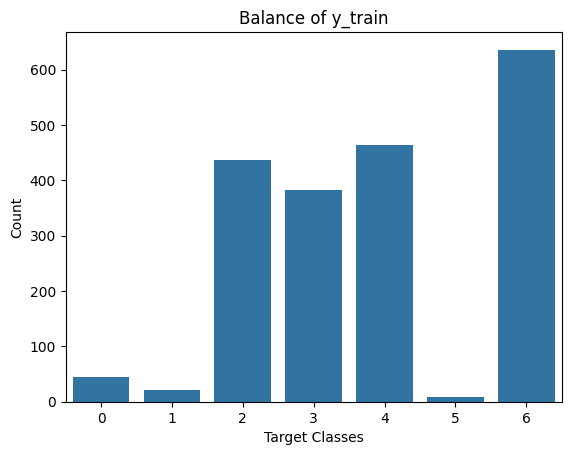

In [ ]:
# Check balance of y_train
p_class = y_train.value_counts() / len(y_train)
if max(p_class) - min(p_class) <= 0.05:
    print(f'Target in y_train is balanced\n')
else:
    print(f'Target in y_train is imbalanced\n')

for target_class, proportion in p_class.items():
    print(f"Class {target_class}: {y_train.value_counts()[target_class]} counts, Proportion = {round(proportion * 100, 2)}%")

# Visualize balance of y_train
sns.countplot(x=y_train)
plt.title("Balance of y_train")
plt.xlabel("Target Classes")
plt.ylabel("Count")
plt.show()

In [ ]:
# Apply SMOTE to balance the training set
sm = SMOTE(random_state=42, k_neighbors=3)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

Class distribution in y_train after SMOTE:
BMIcase_encoded
4    636
2    636
6    636
3    636
0    636
1    636
5    636
Name: count, dtype: int64
Target in y_train_resampled is balanced

Class 4: 636 counts, Proportion = 14.29%
Class 2: 636 counts, Proportion = 14.29%
Class 6: 636 counts, Proportion = 14.29%
Class 3: 636 counts, Proportion = 14.29%
Class 0: 636 counts, Proportion = 14.29%
Class 1: 636 counts, Proportion = 14.29%
Class 5: 636 counts, Proportion = 14.29%


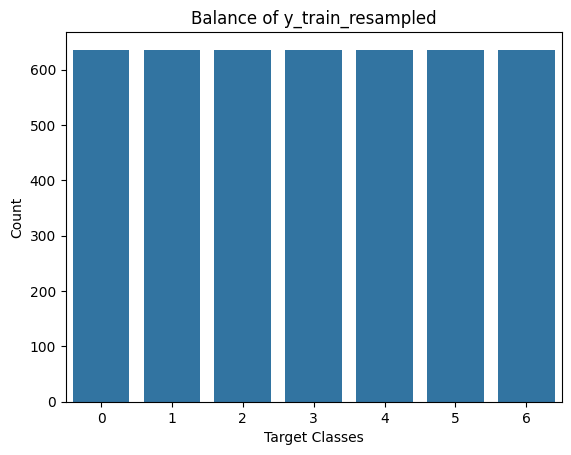

In [ ]:
# Check class distribution after SMOTE
print("Class distribution in y_train after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

p_class_resampled = pd.Series(y_train_resampled).value_counts() / len(y_train_resampled)
if max(p_class_resampled) - min(p_class_resampled) <= 0.05:
    print(f'Target in y_train_resampled is balanced\n')
else:
    print(f'Target in y_train_resampled is imbalanced\n')

for target_class, proportion in p_class_resampled.items():
    print(f"Class {target_class}: {pd.Series(y_train_resampled).value_counts()[target_class]} counts, Proportion = {round(proportion * 100, 2)}%")

sns.countplot(x=pd.Series(y_train_resampled))
plt.title("Balance of y_train_resampled")
plt.xlabel("Target Classes")
plt.ylabel("Count")
plt.show()

# **Model Training**

In [ ]:
# Train Decision Tree Model with Resampled Data
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predictions
y_pred = decision_tree.predict(X_test)
train_accuracy = decision_tree.score(X_train_resampled, y_train_resampled)
test_accuracy = decision_tree.score(X_test, y_test)

print("Training Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Training Accuracy:  1.0
Test Accuracy:  0.7535070140280561
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         5
           2       0.96      0.97      0.97       114
           3       0.62      0.57      0.59       101
           4       0.85      0.82      0.84       112
           5       1.00      1.00      1.00         4
           6       0.58      0.61      0.60       148

    accuracy                           0.75       499
   macro avg       0.86      0.85      0.86       499
weighted avg       0.75      0.75      0.75       499

Confusion Matrix:
 [[ 15   0   0   0   0   0   0]
 [  0   5   0   0   0   0   0]
 [  0   0 111   0   0   0   3]
 [  0   0   0  58   0   0  43]
 [  0   0   0   0  92   0  20]
 [  0   0   0   0   0   4   0]
 [  0   0   5  36  16   0  91]]


In [ ]:
import numpy as np

def get_user_recommendations_rf(weight, height, age):
    # Calculate BMI
    bmi = weight / (height ** 2)

    # BMI case classification
    if bmi < 16:
        bmi_case = 'severe thinness'
    elif 16 <= bmi < 17:
        bmi_case = 'moderate thinness'
    elif 17 <= bmi < 18.5:
        bmi_case = 'mild thinness'
    elif 18.5 <= bmi < 24.9:
        bmi_case = 'normal'
    elif 25 <= bmi < 29.9:
        bmi_case = 'over weight'
    elif 30 <= bmi < 34.9:
        bmi_case = 'obese'
    else:
        bmi_case = 'severe obese'

    # Encode BMI case
    bmi_case_encoded = label_encoder.transform([bmi_case])[0]

    # Prepare input features for the Random Forest model
    input_features = np.array([[weight, height, bmi, age]])

    # Predict BMI case using the trained Random Forest model
    predicted_intensity = decision_tree.predict(input_features)[0]

    # Get exercise recommendations based on the predicted BMI case
    gym_exercise = data.loc[data['BMIcase_encoded'] == predicted_intensity, 'Gym Exercise'].iloc[0]
    home_exercise = data.loc[data['BMIcase_encoded'] == predicted_intensity, 'Home Exercise'].iloc[0]

    return predicted_intensity, gym_exercise, home_exercise, bmi_case

# Example user input
predicted_intensity, gym_exercise, home_exercise, bmi_case = get_user_recommendations_rf(
    weight=75.53521253, height=1.65907713, age=46
)

print(f"Predicted BMI Case (Encoded): {predicted_intensity}\n")
print(f"BMI Case: {bmi_case}\n")
print(f"Recommended Gym Exercise: {gym_exercise}\n")
print(f"Recommended Home Exercise: {home_exercise}\n")



Predicted BMI Case (Encoded): 4

BMI Case: over weight

Recommended Gym Exercise: Treadmill Walking with Intervals; Moderate Weightlifting (Upper and Lower Body); Stationary Biking (High Resistance Intervals); Resistance Circuit Training

Recommended Home Exercise: Modified Burpees; Step-Ups on a Sturdy Chair or Step; Squat Jumps; Glute Bridge Variations



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best Parameters: ", grid_search.best_params_)

# Train best model
best_model = grid_search.best_estimator_
best_model.fit(X_train_resampled, y_train_resampled)

# Evaluate best model
y_test_pred = best_model.predict(X_test)
train_accuracy = best_model.score(X_train_resampled, y_train_resampled)
test_accuracy = best_model.score(X_test, y_test)

print("Training Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Training Accuracy:  0.9207097933513028
Test Accuracy:  0.7875751503006012
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         5
           2       0.96      0.97      0.97       114
           3       0.65      0.69      0.67       101
           4       0.83      0.93      0.88       112
           5       1.00      1.00      1.00         4
           6       0.67      0.57      0.61       148

    accuracy                           0.79       499
   macro avg       0.87      0.88      0.88       499
weighted avg       0.78      0.79      0.78       499

Confusion Matrix:
 [[ 15   0   0   0   0   0   0]
 [  0   5   0   0   0   0   0]
 [  0   0 111   0   0   0   3]
 [  0   0   0  70   0   0  31]
 [  0   0   0   0 104   0   8]
 [  0   0   0   0   0   4   0]
 [  0   0   5  38

In [ ]:
# User Recommendation Function
def get_user_recommendations_rf(weight, height, age):
    bmi = weight / (height ** 2)
    if bmi < 16:
        bmi_case = 'severe thinness'
    elif 16 <= bmi < 17:
        bmi_case = 'moderate thinness'
    elif 17 <= bmi < 18.5:
        bmi_case = 'mild thinness'
    elif 18.5 <= bmi < 24.9:
        bmi_case = 'normal'
    elif 25 <= bmi < 29.9:
        bmi_case = 'over weight'
    elif 30 <= bmi < 34.9:
        bmi_case = 'obese'
    else:
        bmi_case = 'severe obese'

    bmi_case_encoded = label_encoder.transform([bmi_case])[0]
    input_features = np.array([[weight, height, bmi, age]])
    predicted_intensity = best_model.predict(input_features)[0]
    gym_exercise = data.loc[data['BMIcase_encoded'] == predicted_intensity, 'Gym Exercise'].iloc[0]
    home_exercise = data.loc[data['BMIcase_encoded'] == predicted_intensity, 'Home Exercise'].iloc[0]

    return predicted_intensity, gym_exercise, home_exercise, bmi_case

# Example Recommendation
predicted_intensity, gym_exercise, home_exercise, bmi_case = get_user_recommendations_rf(weight=75.5, height=1.65, age=46)
print(f"Predicted BMI Case (Encoded): {predicted_intensity}\n")
print(f"BMI Case: {bmi_case}\n")
print(f"Recommended Gym Exercise: {gym_exercise}\n")
print(f"Recommended Home Exercise: {home_exercise}\n")


Predicted BMI Case (Encoded): 4

BMI Case: over weight

Recommended Gym Exercise: Treadmill Walking with Intervals; Moderate Weightlifting (Upper and Lower Body); Stationary Biking (High Resistance Intervals); Resistance Circuit Training

Recommended Home Exercise: Modified Burpees; Step-Ups on a Sturdy Chair or Step; Squat Jumps; Glute Bridge Variations



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
